In [1]:
cd  "C:\Users\silvi\Desktop\Fisica\TESI\tesi"

C:\Users\silvi\Desktop\Fisica\TESI\tesi


In [2]:
import pandas as pd
import numpy as np

In [24]:
from sklearn import datasets
dat = datasets.load_digits(n_class=10)#, return_X_y=False, as_frame=False)[source]¶

In [25]:
dat_df = pd.DataFrame(dat.data)
dat_df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [26]:
dat_df['target'] = dat.target

In [27]:
data = pd.DataFrame()
for i in range(10):
    data_i = dat_df.query('target=='+str(i)).sample(n=10,random_state=1)
    data = pd.concat([data,data_i])
data.index = np.arange(len(data))

In [28]:
data

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,0.0,9.0,8.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,7.0,14.0,9.0,0.0,0.0,0
1,0.0,0.0,9.0,14.0,15.0,6.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,6.0,14.0,5.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,10.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,8.0,13.0,8.0,0.0,0.0,0
3,0.0,0.0,5.0,16.0,12.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,13.0,8.0,0.0,0.0,0
4,0.0,0.0,0.0,9.0,14.0,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,11.0,16.0,12.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,2.0,10.0,16.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,11.0,16.0,3.0,0.0,0.0,9
96,0.0,0.0,0.0,0.0,8.0,15.0,9.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.0,6.0,0.0,0.0,9
97,0.0,0.0,6.0,15.0,5.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,7.0,12.0,13.0,12.0,1.0,0.0,9
98,0.0,1.0,12.0,15.0,10.0,2.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,11.0,12.0,13.0,4.0,0.0,0.0,9


In [29]:
X = np.array(data[data.columns[0:-1]])
X

array([[ 0.,  0.,  0., ...,  9.,  0.,  0.],
       [ 0.,  0.,  9., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  8.,  0.,  0.],
       ...,
       [ 0.,  0.,  6., ..., 12.,  1.,  0.],
       [ 0.,  1., 12., ...,  4.,  0.,  0.],
       [ 0.,  0.,  9., ..., 11.,  1.,  0.]])

In [30]:
import Mondrian

In [31]:
# parameter setting
t0 = 0
lifetime = 5
exp = 5
metric = 'min_corr'  # 'variance','centroid_diff','centroid_ratio','min'

In [32]:
 list_part,list_m,list_p_tot,list_m_leaf_tot,ami_mean,ami_std,ami_tot = Mondrian.mondrian_forest(X,t0,lifetime,exp,metric,5)

Tree number 1
PARTITIONING:
split  1
split  2
split  3
split  4
split  5
split  6
split  7
split  8
split  9
split  10
split  11
split  12
split  13
split  14
split  15
split  16
split  17
split  18
split  19
split  19
split  20
split  21
split  22
split  23
split  24
split  24
split  25
split  26
split  27
split  28
split  29
split  29
split  30
split  30
split  31
split  31
split  31
split  31
split  32
split  33
split  34
split  35
split  36
split  37
split  38
split  38
split  39
split  39
split  40
split  41
split  42
split  42
split  43
split  43
split  44
split  45
split  46
split  47
split  47
split  47
split  47
split  47
split  47
split  47
split  47
split  47
split  47
split  47
split  48
split  48
split  48
split  48
split  48
split  48
split  49
split  50
split  51
split  52
split  52
split  53
split  54
split  54
split  55
split  56
split  56
split  57
split  57
split  57
split  58
split  58
split  59
split  59
split  59
split  59
split  59
split  59
split  60
split  60
s

In [21]:
namefile = 'example/digits_n10_seed1/digits_n10_seed1_lambda5_exp5_min_corr'
Mondrian.save_forest(namefile,list_part,list_m,list_p_tot,list_m_leaf_tot,ami_mean,ami_std,ami_tot)

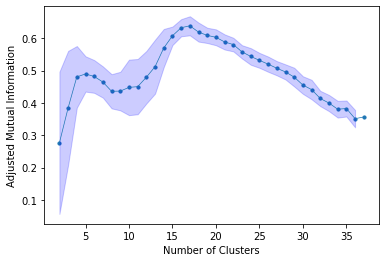

In [20]:
import Plot
Plot.plot_AMI(ami_mean,ami_std)